<a href="https://colab.research.google.com/github/audrey-yung/bio108-work/blob/main/bird_diversity_mexico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using raw datasets

The dataset I am using for this notebook is *Bird diversity in remnants of deciduous tropical forest in Central Mexico* from Harvard Dataverse. You can find the link to the original data [here](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/QKRK3S). For your convenience, I've uploaded the data files to my Github repository-- you can find that [here](https://github.com/audrey-yung/bio108-work/tree/main/raw-datasets/bird-diversity-central-mexico).

This dataset is not currently associated with a published research article, but there are some simple analyses that have been conducted in the raw data spreadsheets. In this exercise, I replicate these figures using Python.

The questions I want to investigate are as follows:


1.   What species are present in the study area?
2.   How do the forest and park habitats differ?
3.   Do the observed birds display a preference of one habitat over the other? Are there differences between different life stages?




## Importing the necessary packages

In [25]:
### importing libraries to work with data sets and data frames
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Reading in the data

The first file we will be reading in is called "Vegetation Totlali Park Forest_Coefficient of Variation_18Dic2021.xlsx" and can be found in my [Github repository](https://github.com/audrey-yung/bio108-work/tree/main/raw-datasets/bird-diversity-central-mexico). Find that file and open it to see this page:

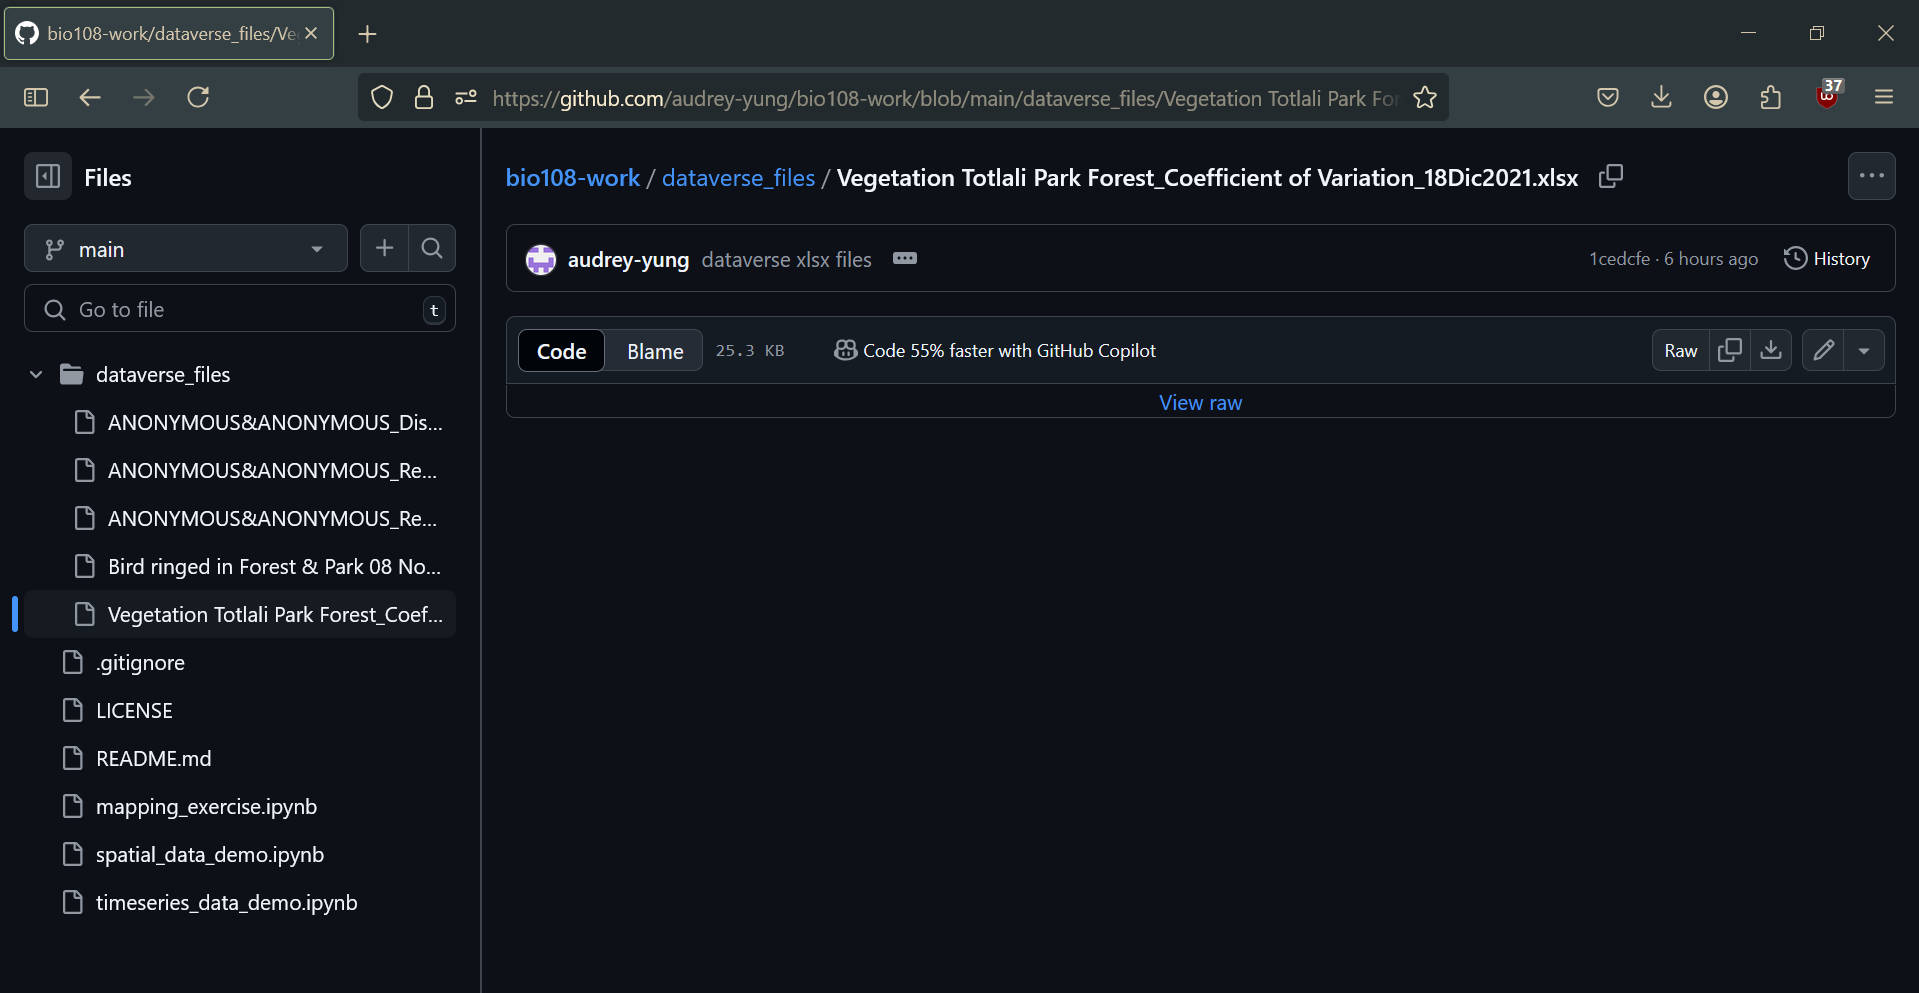

From here, copy the web url and set it as the value of a new variable (I used `veg_mexico_url`).

In [42]:
### identifying the source for the raw data
veg_mexico_url = "https://github.com/audrey-yung/bio108-work/blob/main/raw-datasets/bird-diversity-central-mexico/Vegetation%20Totlali%20Park%20Forest_Coefficient%20of%20Variation_18Dic2021.xlsx" + "?raw=true"

Note that the syntax I used to define `veg_mexico_url` has `+ "?raw=true"` tacked on at the end. This tells Colab/Python that we want to extract the raw data that is associated with the link that we are directing it to, rather than just the identity of the web url.

Now, we are going to use the `pandas` package (which we've abbreviated as `pd`) to read in the file. In many other tutorials, you may use the function `.read_csv()`, but in this demo, we are working with `.xlsx` files, so we will use `.read_excel` instead.

In [43]:
# using pd.read_excel to read in the data
veg_mexico = pd.read_excel(veg_mexico_url)

It's generally good practice to use `.head()` to take a look at what the data you just loaded in looks like. Let's take a look at `veg_mexico`:

In [ ]:
### using .head() to check how the data frame looks
veg_mexico.head()

,"In July 2021, in each count point, we recorded the height of the highest plant from each stratum (tree, shrub and herbaceous) within the ten-meter-diameter with respect to the center of the influence zone of the count point"
0,"Additionally, we took a fish-eye photography o..."
1,"We used 180-198°, 0.28x, max. diameter 25 mm, ..."
2,We used the Gap Light Analyzer software to est...
3,"As some count points lay in open areas, the ca..."
4,"We put the phone on 120 cm height, on the trip..."


Now, this is odd considering we were expecting to see a datasheet of some sorts-- something like this: ![](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fdatacarpentry.github.io%2Fspreadsheet-ecology-lesson%2Ffig%2Fsingle-info.png&f=1&nofb=1&ipt=fce8d21287fd25b51a1b8700ed0fa2ff4cc09fc47454ab87b9ddaea9ad24fcb3&ipo=images)

If we download and open the source spreadsheet in Excel, this is what we will see:

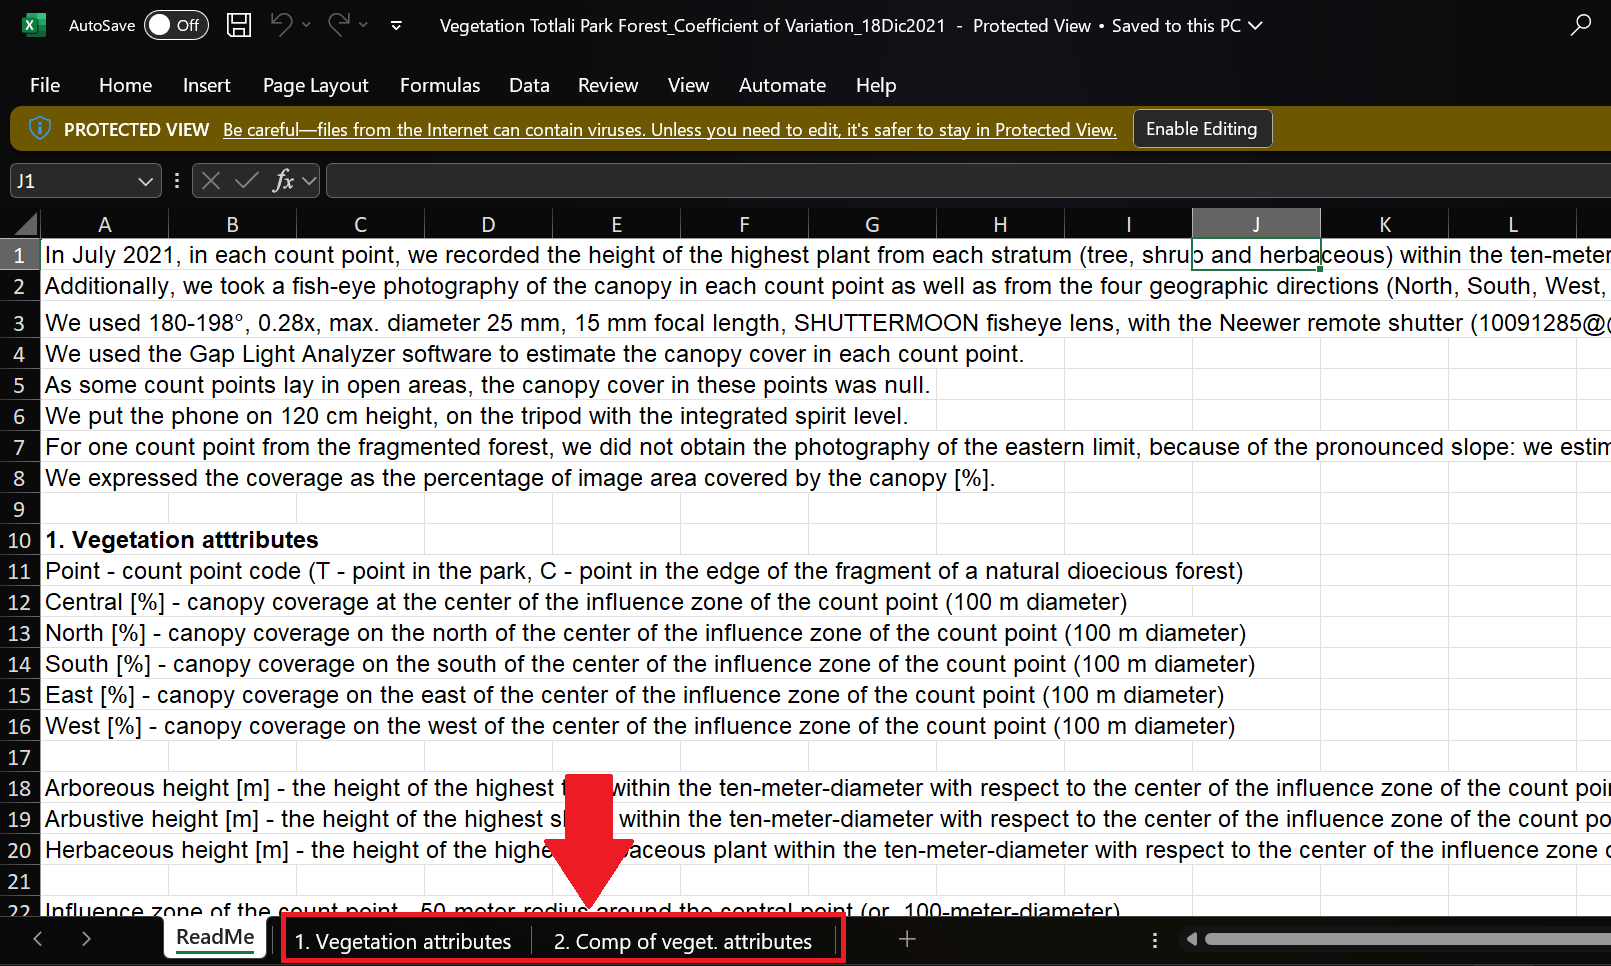

What we see here is that the first sheet of the spreadsheet is a ReadMe tab, where the metadata about the document is stored. What we need is to get to the second sheet on this document, titled "1. Vegetation attributes", which we can do by applying the `sheet_name = ` function.

In [17]:
### applying sheet_name =
veg_mexico = pd.read_excel(veg_mexico_url,
                           sheet_name=1     # this is indexing the second sheet in this spreadsheet (the first sheet would be index 0)
                           )

In [18]:
### using .head() to check how the data frame looks
veg_mexico.head()

,Unnamed: 0,Point,Central [%],North [%],South [%],East [%],West [%],Arboreous height [m],Arbustive height [m],Herbaceous height [m],Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,Forest,1C,65.74,86.75,93.64,24.92,100.00,6.7,2.06,1.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Forest,2C,88.80,99.27,100.00,44.12,100.00,8.7,3.20,1.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Forest,3C,84.53,99.88,99.85,20.10,100.00,4.8,1.94,0.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Forest,4C,44.74,90.66,21.91,27.52,99.32,7.8,1.74,1.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Forest,5C,85.88,38.54,55.87,24.60,100.00,7.2,1.98,1.42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


If we look back at the original spreadsheet, we can see that there are some notes that the original authors have made that are not relevant to us. We only want what I have outlined in the red box. Python doesn't necessarily acknowledge the bar plot that is in the sheet, so we can use the `usecols = ` function to isolate the columns that we want to use.

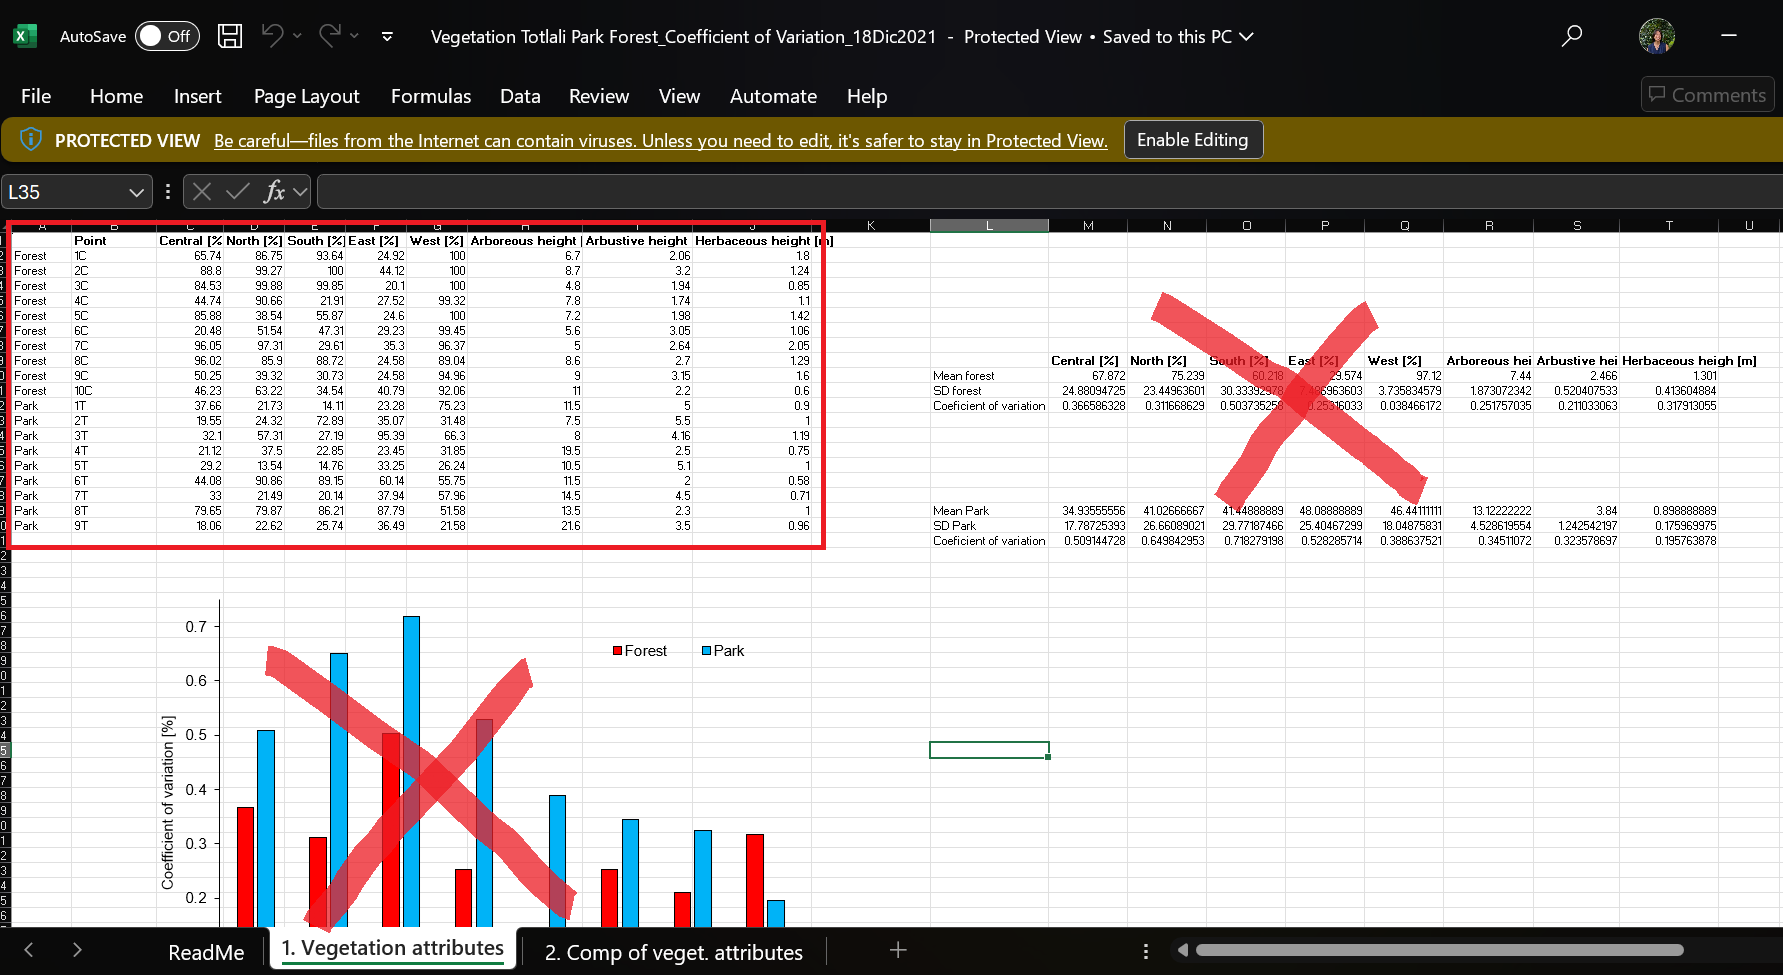

In [20]:
### adding usecols =
 veg_mexico = pd.read_excel(veg_mexico_url,
                            sheet_name=1,     # this is indexing the second sheet in this spreadsheet (the first sheet would be index 0)
                            usecols = "A:J"   # we are selecting only columns A through J
                            )

In [21]:
### using .head() to check how the data frame looks
veg_mexico.head()

,Unnamed: 0,Point,Central [%],North [%],South [%],East [%],West [%],Arboreous height [m],Arbustive height [m],Herbaceous height [m]
0,Forest,1C,65.74,86.75,93.64,24.92,100.00,6.7,2.06,1.80
1,Forest,2C,88.80,99.27,100.00,44.12,100.00,8.7,3.20,1.24
2,Forest,3C,84.53,99.88,99.85,20.10,100.00,4.8,1.94,0.85
3,Forest,4C,44.74,90.66,21.91,27.52,99.32,7.8,1.74,1.10
4,Forest,5C,85.88,38.54,55.87,24.60,100.00,7.2,1.98,1.42


## Practice: reading in bird count data
Now that we've had a chance to look at how to tidy up some messy and raw data, try to do it on your own! Once again, go back to my [Github repository](https://github.com/audrey-yung/bio108-work/tree/main/raw-datasets/bird-diversity-central-mexico) to access the file "Bird ringed in Forest & Park 08 Nov 2021.xlsx". The two sheets of interest in the spreadsheet are the **second and third** sheets-- "Birds ringed in the forest" and "Birds ringed in the park", respectively.

Please name the "Birds ringed in the forest" data as `birdcounts_forest` and "Birds ringed in the park" as `birdcounts_park`.

For your convenience, I'll show you what the raw data looks like:

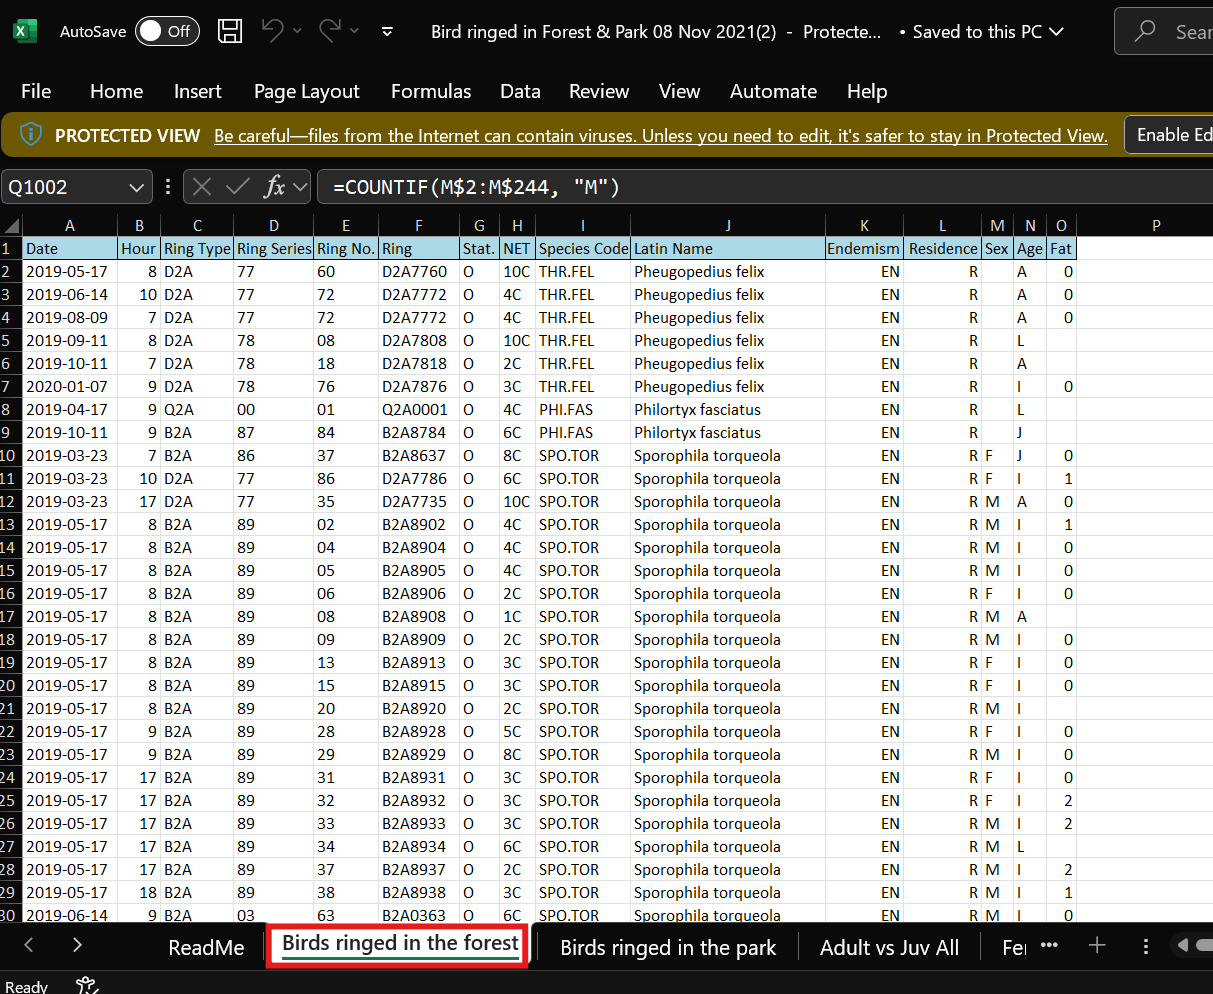

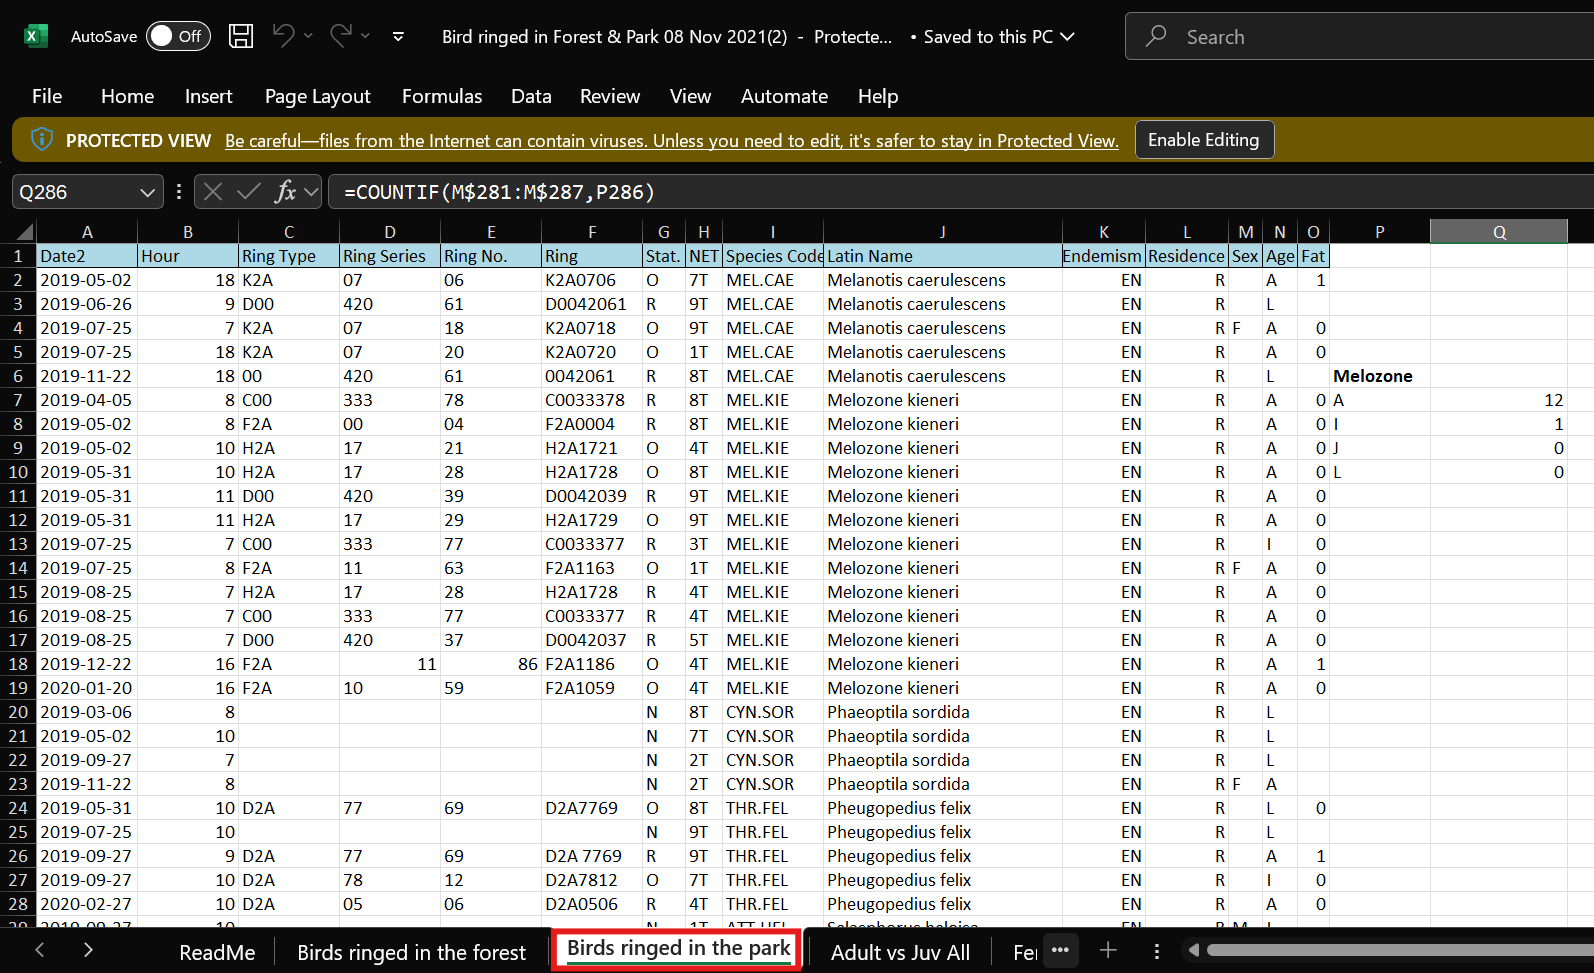

#### Sample answer code to read in bird count data

```
### accessing the github url
birdcounts_url = "https://github.com/audrey-yung/bio108-work/blob/main/raw-datasets/bird-diversity-central-mexico/Bird%20ringed%20in%20Forest%20%26%20Park%2008%20Nov%202021.xlsx" + "?raw=true"

### reading in the "birds ringed in forest" sheet
birdcounts_forest = pd.read_excel(birdcounts_url,
                           sheet_name = 1,
                           usecols = "A:O")

### reading in the "birds ringed in the park" sheet
birdcounts_park = pd.read_excel(birdcounts_url,
                           sheet_name = 2,
                           usecols = "A:O")
```

```
birdcounts_forest.head()
birdcounts_park.head()
```

## final products that i want to have:


*   make this figure: 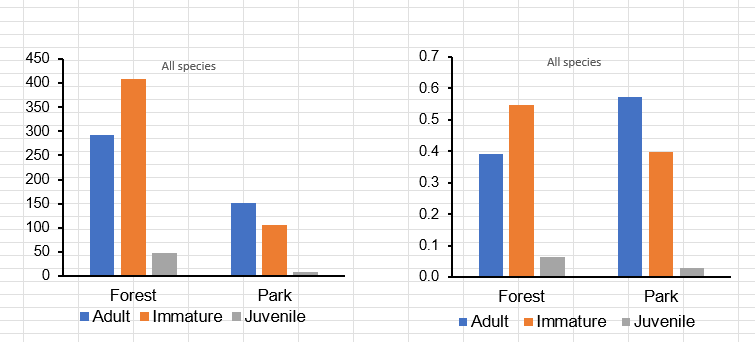
*   create a list of unique species present in park/forest. also value counts of unique species
*  plot canopy cover, arboreal/arbustuous/herbaceous height (histogram type)
* comparison of where birds where banded. ie more birds banded in one zone than the other?
* make a version of this plot but instead of bar plot, it would be a jitter plot with means and 95%CI. also split it up into different figures instead of just one 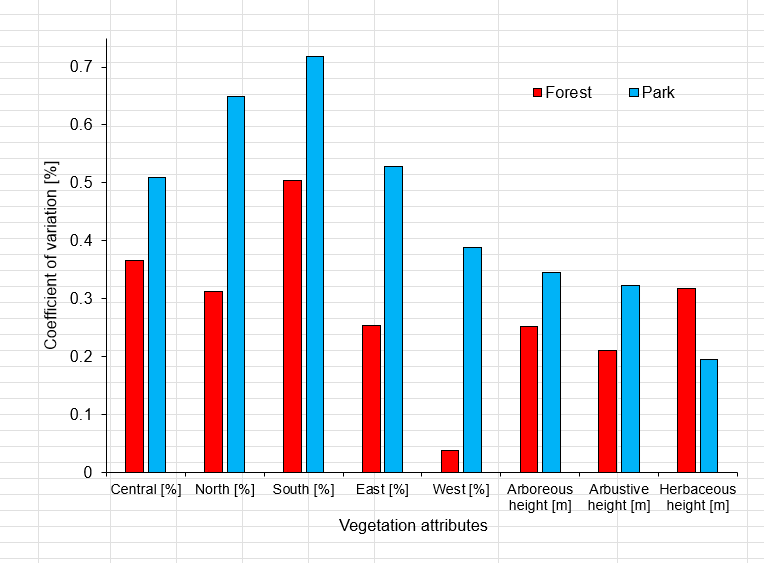

